In [3]:
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt

In [4]:
#reading in the CSE 11 file which has the PA grades:
grade_reporting = pd.read_csv("../Data/CSE 11 Fall 2019 DeID/DeID GradeReporting_CSE11_F19.csv")

In [5]:
#reading in the CSE 11 file which has the pre_survey data:
pre_survey = pd.read_csv("../Data/CSE 11 Fall 2019 DeID/DeID Pre-Survey CSE 11 Fall 2019.csv")

In [6]:
#renaming the "Did you enter UCSD as a transfer student...." column:
pre_survey = pre_survey.rename(columns =({"Did.you.enter.UCSD.as.a.transfer.student.from.another..2.year.or.4.year..college.or.university.":"transfer_student_status"}))

In [7]:
#making sure the column got renamed:
pre_survey.head(1)

,Timestamp,transfer_student_status,If.your.current.declared.major.is.different.from.your.desired.major..i.e..you.hope.to.switch.majors...what.major.do.you.hope.to.switch.to...Leave.blank.if.this.does.not.apply.to.you..,What.is.the.main.reason.you.are.taking.this.course.,On.a.scale.of.1.to.5..how.much.experience.did.you.have.with.programming.computer.science.before.you.took.your.FIRST.course.at.UC.San.Diego.,Please.select.all.of.the.CS.programming.experiences.you.had.before.taking.your.FIRST.CS.course.at.UCSD.,Please.rate.your.current.level.of.experience.with.technology.in.general,On.a.scale.of.1.to.5..how.confident.are.you.about.your.ability.to.do.well.in.this.course.,What.is.the.MINIMUM.grade.you.think.you.would.be.satisfied.with.in.this.course...If.you.re.taking.this.course.pass.no.pass..note.that.C..is.the.threshold.for.passing...,What.is.your.gender.,What.is.your.ethnicity.,What.is.your.race...Select.all.that.apply.,What.is.your.fluency.with.English.,DeID
0,9/27/2019 16:28,No,NaN,To fulfill a major requirement (for your curre...,3.0,"Took AP CS A, Took AP Calculus, Took AP Statis...","A lot of experience: e.g., worked with multipl...",5.0,A,Male,Not Hispanic or Latino/a,East or Southeast Asian,I learned English as a child in a bilingual or...,00T90APX


In [8]:
#filtering the pre_survey table only with transfer status and DeID:
transferStatusWithDeID = pre_survey[["transfer_student_status","DeID"]]

In [9]:
#viewing the filtered table(IMPORTANT: includes NaN values) :
print(transferStatusWithDeID)

    transfer_student_status      DeID
0                        No  00T90APX
1                       Yes  01EAM9F6
2                        No  025LQFB2
3                        No  039HIM2X
4                        No  04T56IGQ
..                      ...       ...
477                      No  ZWOIJJTE
478                      No  ZZ5H6MQD
479                      No  ZZCK945I
480                     NaN       NaN
481                     NaN       NaN

[482 rows x 2 columns]


In [10]:
transferStatusWithDeID = transferStatusWithDeID.dropna()

In [11]:
#getting the x_values:
x_label = ["PA1", "PA2","PA3","PA4","PA5","PA6","PA7","PA8","PA9"]

In [12]:
#filtering only the students that are TRANSFER students and printing that table:
onlyTransferStudents = transferStatusWithDeID[transferStatusWithDeID.transfer_student_status == "Yes"]
#print(onlyTransferStudents)

In [13]:
#filtering only students that are REGULAR students and printing that table:
onlyRegularStudents = transferStatusWithDeID[transferStatusWithDeID.transfer_student_status == "No"]
print(onlyRegularStudents)

    transfer_student_status      DeID
0                        No  00T90APX
2                        No  025LQFB2
3                        No  039HIM2X
4                        No  04T56IGQ
5                        No  06HH1YB1
..                      ...       ...
474                      No  ZQRWVMSS
475                      No  ZT9CDKWM
477                      No  ZWOIJJTE
478                      No  ZZ5H6MQD
479                      No  ZZCK945I

[419 rows x 2 columns]


In [14]:
#extracting the table which contains only the PA1 scores and DeID:
PA_and_DeID = grade_reporting[["PA1","PA2","PA3","PA4","PA5","PA6","PA7","PA8","PA9","DeID"]]
PA_and_DeID.head()

,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9,DeID
0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,1.0,00T90APX
1,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,01EAM9F6
2,1.0,1.0,1.0,0.866667,1.0,1.0,1.0,1.00,1.0,025LQFB2
3,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.99,1.0,039HIM2X
4,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,1.0,04T56IGQ


In [15]:
#merging the PA1 table with the table which has transfer student status:
PA_transferStatus = pd.merge(transferStatusWithDeID,PA_and_DeID)
PA_transferStatus.head() #to conduct a sanity check and make sure values are merged correctly

,transfer_student_status,DeID,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9
0,No,00T90APX,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,1.0
1,Yes,01EAM9F6,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0
2,No,025LQFB2,1.0,1.0,1.0,0.866667,1.0,1.0,1.0,1.00,1.0
3,No,039HIM2X,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.99,1.0
4,No,04T56IGQ,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,1.0


In [16]:
#to conduct a sanity check with the last 5 values:
PA_transferStatus.tail()

,transfer_student_status,DeID,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9
465,No,ZT9CDKWM,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.00,1.00
466,Yes,ZTFNAYUD,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00,0.00
467,No,ZWOIJJTE,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.00,1.00
468,No,ZZ5H6MQD,1.0,0.866667,0.933333,1.0,0.666667,1.0,1.0,0.99,0.85
469,No,ZZCK945I,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.00,1.00


In [17]:
#for sanity check purposes
PA_and_DeID.tail()

,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9,DeID
492,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.00,1.00,ZT9CDKWM
493,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00,0.00,ZTFNAYUD
494,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.00,1.00,ZWOIJJTE
495,1.0,0.866667,0.933333,1.0,0.666667,1.0,1.0,0.99,0.85,ZZ5H6MQD
496,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.00,1.00,ZZCK945I


In [18]:
#for sanity check purposes:
PA_transferStatus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 469
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transfer_student_status  470 non-null    object 
 1   DeID                     470 non-null    object 
 2   PA1                      470 non-null    float64
 3   PA2                      470 non-null    float64
 4   PA3                      470 non-null    float64
 5   PA4                      470 non-null    float64
 6   PA5                      470 non-null    float64
 7   PA6                      470 non-null    float64
 8   PA7                      470 non-null    float64
 9   PA8                      470 non-null    float64
 10  PA9                      470 non-null    float64
dtypes: float64(9), object(2)
memory usage: 44.1+ KB


In [19]:
PA_transferStatus.head()

,transfer_student_status,DeID,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9
0,No,00T90APX,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,1.0
1,Yes,01EAM9F6,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0
2,No,025LQFB2,1.0,1.0,1.0,0.866667,1.0,1.0,1.0,1.00,1.0
3,No,039HIM2X,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.99,1.0
4,No,04T56IGQ,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,1.0


In [20]:
#getting the y_values (PA1 average for transfers):
grade_reporting.head()

,Overall.weighted.course.percentage,Final.exam.percentage,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,...,Lecture.21..1.,Lecture.22..1.,Lecture.23..1.,Lecture.24..1.,Lecture.25..1.,Lecture.26..1.,Lecture.27..1.,Lecture.28..1.,Lecture.29..1.,DeID
0,0.959167,0.883333,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,...,1,1,1,1,1,1,1,1,1,00T90APX
1,0.067128,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,...,0,0,1,0,0,0,0,0,0,01EAM9F6
2,0.943173,0.875000,1.0,1.0,1.0,0.866667,1.0,1.0,1.0,1.00,...,1,1,1,1,1,1,0,1,1,025LQFB2
3,0.975942,0.958333,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.99,...,1,1,1,0,1,1,1,1,1,039HIM2X
4,0.991250,0.975000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,...,1,1,1,1,1,1,1,1,1,04T56IGQ


In [27]:
#filtering PA scores for just transfer students:
PA_transfers = PA_transferStatus[PA_transferStatus.transfer_student_status == "Yes"]
print(PA_transfers)

    transfer_student_status      DeID       PA1       PA2       PA3       PA4  \
1                       Yes  01EAM9F6  1.000000  0.000000  0.000000  0.000000   
21                      Yes  1DSTM3NG  1.000000  0.933333  0.000000  0.000000   
24                      Yes  1ORHZ9JA  1.000000  1.000000  1.000000  1.000000   
48                      Yes  3D3BRZB7  1.000000  1.000000  1.000000  1.000000   
51                      Yes  3LYT1R1X  1.000000  1.000000  1.000000  1.000000   
61                      Yes  51MR6YN1  1.000000  1.000000  1.000000  1.000000   
75                      Yes  62IJ27VA  1.000000  1.000000  1.000000  1.000000   
81                      Yes  6KO63VOW  1.000000  1.000000  0.800000  0.266667   
93                      Yes  7GKTBBQY  1.000000  0.200000  0.000000  0.000000   
101                     Yes  7S0FMBQB  1.000000  1.000000  1.000000  1.000000   
110                     Yes  85YCIZ2K  1.000000  1.000000  1.000000  1.000000   
113                     Yes 

In [28]:
#filtering PA scores for just native students:
PA_natives = PA_transferStatus[PA_transferStatus.transfer_student_status == "No"]
print(PA_natives)

    transfer_student_status      DeID  PA1       PA2       PA3       PA4  \
0                        No  00T90APX  1.0  1.000000  1.000000  1.000000   
2                        No  025LQFB2  1.0  1.000000  1.000000  0.866667   
3                        No  039HIM2X  1.0  1.000000  1.000000  1.000000   
4                        No  04T56IGQ  1.0  1.000000  1.000000  1.000000   
5                        No  06HH1YB1  1.0  1.000000  1.000000  1.000000   
..                      ...       ...  ...       ...       ...       ...   
464                      No  ZQRWVMSS  1.0  1.000000  0.933333  1.000000   
465                      No  ZT9CDKWM  1.0  1.000000  1.000000  1.000000   
467                      No  ZWOIJJTE  1.0  1.000000  1.000000  1.000000   
468                      No  ZZ5H6MQD  1.0  0.866667  0.933333  1.000000   
469                      No  ZZCK945I  1.0  1.000000  1.000000  1.000000   

          PA5  PA6  PA7       PA8   PA9  
0    1.000000  1.0  1.0  1.000000  1.00  
2  

In [29]:
PA1_transfer_average = (PA_transfers["PA1"].mean()) * 100 #calculating average of PA1 transfer students score
PA1_natives_average = (PA_natives["PA1"].mean())*100 #calculating average of PA1 natives students score

In [30]:
print(PA1_transfer_average)

95.2380952385965


In [31]:
print(PA1_natives_average)

98.78934624697337


In [32]:
PAscores_transfer = []
PAscores_natives = []
PAscores_transfer.append(PA1_transfer_average)
PAscores_natives.append(PA1_natives_average)

In [33]:
#calculating PA2 and PA3 averages for transfers and natives:
PA2_transfer_average = (PA_transfers["PA2"].mean()) * 100 #calculating average of PA2 transfer students score
PA2_natives_average = (PA_natives["PA2"].mean()) * 100 #calculating average of PA2 natives students score

PA3_transfer_average = (PA_transfers["PA3"].mean()) * 100 #calculating average of PA3 transfer students score
PA3_natives_average = (PA_natives["PA3"].mean()) * 100 #calculating average of PA3 natives students score

In [34]:
#appending PA2 averages for both transfers and natives
print(PA2_transfer_average) #printing to make sure value was calculated
print(PA2_natives_average)

PAscores_transfer.append(PA2_transfer_average) #actually appending the value
PAscores_natives.append(PA2_natives_average) #actually appending the value

print(PAscores_transfer)
print(PAscores_natives)

84.32748537894737
93.47861178280871
[95.2380952385965, 84.32748537894737]
[98.78934624697337, 93.47861178280871]


In [35]:
#appending PA3 averages for both transfers and natives:
PAscores_transfer.append(PA3_transfer_average) #appending the value for transfers
PAscores_natives.append(PA3_natives_average) #appending the value for natives
print(PAscores_transfer)
print(PAscores_natives)

[95.2380952385965, 84.32748537894737, 77.07602339298246]
[98.78934624697337, 93.47861178280871, 89.23325262227603]


In [36]:
#calculating average scores for the remaining PAs (PA4 - PA9):
PA4_transfer_average = (PA_transfers["PA4"].mean()) * 100 #calculating average of PA4 transfer students score
PA4_natives_average = (PA_natives["PA4"].mean()) * 100 #calculating average of PA4 natives students score

PA5_transfer_average = (PA_transfers["PA5"].mean()) * 100 #calculating average of PA5 transfer students score
PA5_natives_average = (PA_natives["PA5"].mean()) * 100 #calculating average of PA5 natives students score

PA6_transfer_average = (PA_transfers["PA6"].mean()) * 100 #calculating average of PA6 transfer students score
PA6_natives_average = (PA_natives["PA6"].mean()) * 100 #calculating average of PA6 natives students score

PA7_transfer_average = (PA_transfers["PA7"].mean()) * 100 #calculating average of PA7 transfer students score
PA7_natives_average = (PA_natives["PA7"].mean()) * 100 #calculating average of PA7 natives students score

PA8_transfer_average = (PA_transfers["PA8"].mean()) * 100 #calculating average of PA8 transfer students score
PA8_natives_average = (PA_natives["PA8"].mean()) * 100 #calculating average of PA8 natives students score

PA9_transfer_average = (PA_transfers["PA9"].mean()) * 100 #calculating average of PA9 transfer students score
PA9_natives_average = (PA_natives["PA9"].mean()) * 100 #calculating average of PA9 natives students score

In [37]:
#appending PA4 values for both transfers and natives:
PAscores_transfer.append(PA4_transfer_average) #appending the value for transfers
PAscores_natives.append(PA4_natives_average) #appending the value for natives

#appending PA5 values for both transfers and natives:
PAscores_transfer.append(PA5_transfer_average) #appending the value for transfers
PAscores_natives.append(PA5_natives_average) #appending the value for natives

#appending PA6 values:
PAscores_transfer.append(PA6_transfer_average) #appending the value for transfers
PAscores_natives.append(PA6_natives_average) #appending the value for natives

#appending PA7 values:
PAscores_transfer.append(PA7_transfer_average) #appending the value for transfers
PAscores_natives.append(PA7_natives_average) #appending the value for natives

#appending PA8 values:
PAscores_transfer.append(PA8_transfer_average) #appending the value for transfers
PAscores_natives.append(PA8_natives_average) #appending the value for natives

#appending PA9 values:
PAscores_transfer.append(PA9_transfer_average) #appending the value for transfers
PAscores_natives.append(PA9_natives_average) #appending the value for natives

In [38]:
#printing transfer students average PA scores:
print(PAscores_transfer)

[95.2380952385965, 84.32748537894737, 77.07602339298246, 76.0233918140351, 73.56725146315789, 74.16267942631579, 74.26900584736842, 72.49122806842104, 70.9122807]


In [39]:
#printing native students average PA scores:
print(PAscores_natives)

[98.78934624697337, 93.47861178280871, 89.23325262227603, 89.13640032348668, 89.00726392154964, 89.41228263244551, 88.79741727094432, 87.18062953898306, 87.94915254213075]


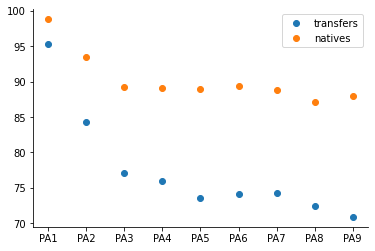

In [40]:
plt.plot(x_label,PAscores_transfer,"o")
plt.plot(x_label,PAscores_natives,"o")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.legend(['transfers','natives'])

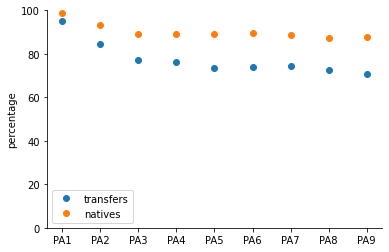

In [41]:
plt.plot(x_label,PAscores_transfer,"o")
plt.plot(x_label,PAscores_natives,"o")
plt.ylim(0,100)
plt.ylabel("percentage")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.legend(['transfers','natives'])